In [4]:
import pandas as pd

#Carregar o arquivo CSV
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#Vizualizar as primeiras linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
# Ver info geral (tipos de dados, nulos etc.)
df.info()

## Ver estatísticas das colunas numéricas
df.describe()

# Ver quantas pessoas cancelaram vs. ficaram
df["Churn"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,count
Churn,
No,5174
Yes,1869


In [8]:
# Ver o tipo da coluna
df["TotalCharges"].dtype

dtype('O')

In [12]:
# Converter TotalCharges para numérico (substitui erros com NaN)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [14]:
# Ver valores nulos
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
# Remover linhas com valores ausentes
df = df.dropna()

In [16]:
#Transformar a variavel Churn em 0 e 1
df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

<ipython-input-16-058a49cddc8a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})


In [17]:
# Remover customerID (não é útil para o modelo)
df = df.drop("customerID", axis=1)

# Criar variáveis dummies automaticamente para todas as colunas categóricas
df_dummies = pd.get_dummies(df, drop_first=True)

In [18]:
#Separar features (X) e target (y)
X = df_dummies.drop("Churn", axis=1)
y = df_dummies["Churn"]

In [19]:
from sklearn.model_selection import train_test_split
# Separar 80% treino, 20% teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
#Treinar modelo de Regressão Logística
from sklearn.linear_model import LogisticRegression
# Criação do modelo
modelo = LogisticRegression(max_iter=1000)

# Treinar com os dados
modelo.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Previsões
y_pred = modelo.predict(X_test)

#Acurácia
print("Acurácia:",accuracy_score(y_test, y_pred))

#Matriz de confusão
print("Matriz de confusão:\n", confusion_matrix(y_test, y_pred))

#Relatória de classificação
print("Relatório:\n", classification_report(y_test, y_pred))

Acurácia: 0.7874911158493249
Matriz de confusão:
 [[915 118]
 [181 193]]
Relatório:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

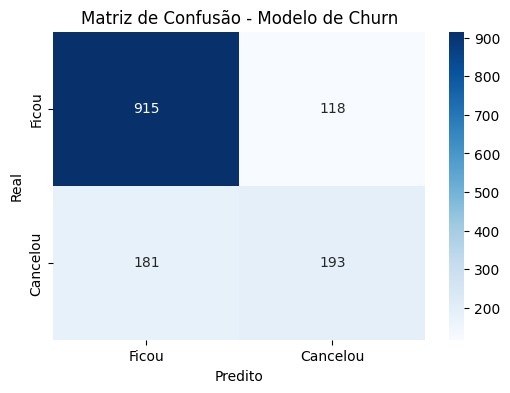

In [30]:
# Gerar a matriz de confusão
matriz = confusion_matrix(y_test, y_pred)

# Plotar com seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(matriz, annot=True, fmt="d", cmap="Blues", xticklabels=["Ficou", "Cancelou"], yticklabels=["Ficou", "Cancelou"])
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão - Modelo de Churn")
plt.show()

In [31]:
import numpy as np
import pandas as pd
# Coeficientes do modelo
importancia = pd.Series(modelo.coef_[0], index=X.columns)
# Ordenar do mais influente pro menos
importancia = importancia.sort_values()

# Exibir os 10 com menor e maior impacto
print("Variáveis com maior impacto negativo (menos churn):")
print(importancia.head(10), "\n")

print("Variáveis com maior impacto positivo (mais churn):")
print(importancia.tail(10))

Variáveis com maior impacto negativo (menos churn):
Contract_Two year                       -1.303286
Contract_One year                       -0.766548
OnlineSecurity_Yes                      -0.458944
TechSupport_Yes                         -0.434327
PhoneService_Yes                        -0.394096
Dependents_Yes                          -0.213952
OnlineBackup_Yes                        -0.145517
PaymentMethod_Credit card (automatic)   -0.125600
StreamingTV_No internet service         -0.096180
TechSupport_No internet service         -0.096180
dtype: float64 

Variáveis com maior impacto positivo (mais churn):
MonthlyCharges                    0.002479
Partner_Yes                       0.056357
StreamingTV_Yes                   0.197909
MultipleLines_Yes                 0.208278
StreamingMovies_Yes               0.216093
SeniorCitizen                     0.254155
PaymentMethod_Electronic check    0.259685
MultipleLines_No phone service    0.273878
PaperlessBilling_Yes              0.

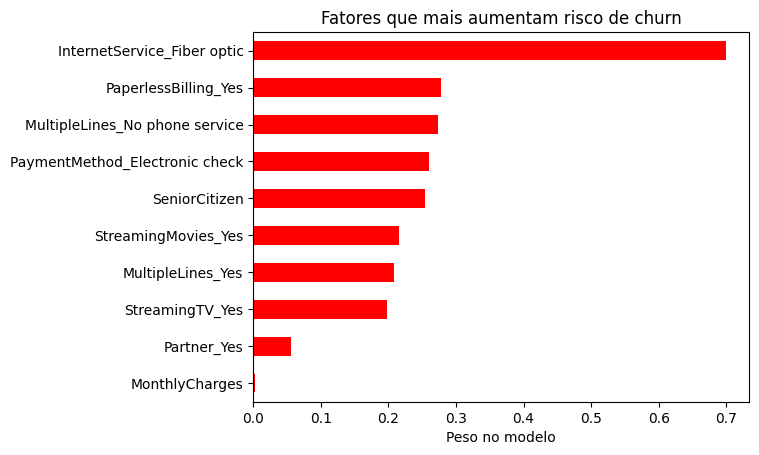

In [32]:
# Gráfico das 10 variáveis mais influentes positivamente
importancia.tail(10).plot(kind='barh', title="Fatores que mais aumentam risco de churn", color='red')
plt.xlabel("Peso no modelo")
plt.show()

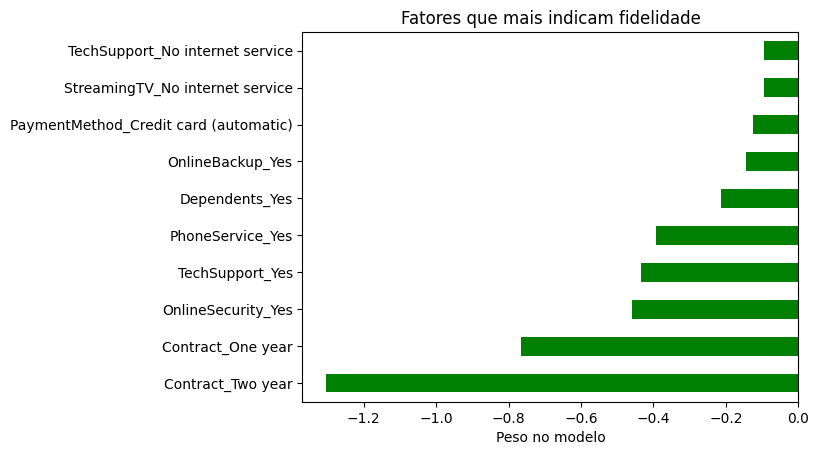

In [33]:
# Gráfico das 10 variáveis que mais ajudam a reter clientes
importancia.head(10).plot(kind='barh', title="Fatores que mais indicam fidelidade", color='green')
plt.xlabel("Peso no modelo")
plt.show()

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Árvore de Decisão
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(X_train, y_train)

# Random Forest
floresta = RandomForestClassifier(n_estimators=100, random_state=42)
floresta.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
#Avaliação de todos os modelos
from sklearn.metrics import accuracy_score, classification_report

def avaliar_modelo(nome, modelo):
    y_pred = modelo.predict(X_test)
    print(f"\n📊 Avaliação do modelo: {nome}")
    print("Acurácia:", round(accuracy_score(y_test, y_pred), 4))
    print("Relatório de classificação:\n", classification_report(y_test, y_pred))

In [36]:
#Avaliar todos juntos:
avaliar_modelo("Regressão Logística", modelo)
avaliar_modelo("Árvore de Decisão", arvore)
avaliar_modelo("Random Forest", floresta)


📊 Avaliação do modelo: Regressão Logística
Acurácia: 0.7875
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.52      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


📊 Avaliação do modelo: Árvore de Decisão
Acurácia: 0.7249
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81      1033
           1       0.48      0.52      0.50       374

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.66      1407
weighted avg       0.73      0.72      0.73      1407


📊 Avaliação do modelo: Random Forest
Acurácia: 0.7854
Relatório de classificação:
               precision    recall  f1-score   support

           0       0.83      